In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
def plot_household_expense_trend(data):
    plt.figure(figsize=(12, 6))  # Set the figure size
    
    sns.lineplot(data=data, x='year', y='Cost11', marker='o', color='blue')
    plt.title('Household Expense Trend for Food, Hotel, and Restaurant', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Expense', fontsize=12)
    
    plt.tight_layout()  # Adjust the layout
    plt.show()


In [28]:
data = pd.read_csv('df.csv')
print(data.columns)

Index(['Unnamed: 0', 'Address', 'weight', 'khanevartype', 'Takmil', 'province',
       'town', 'tenure', 'room', 'space', 'construction', 'material',
       'vehicle', 'motorcycle', 'bicycle', 'radio', 'radiotape', 'TVbw', 'TV',
       'VHS_VCD_DVD', 'computer', 'cellphone', 'freezer', 'refridgerator',
       'fridge', 'stove', 'vacuum', 'washingmachine', 'sewingmachine', 'fan',
       'evapcoolingportable', 'splitportable', 'dishwasher', 'microwave',
       'none', 'pipewater', 'electricity', 'pipegas', 'telephone', 'internet',
       'bathroom', 'kitchen', 'evapcooling', 'centralcooling',
       'centralheating', 'package', 'split', 'wastewater', 'cookingfuel',
       'heatingfuel', 'waterheatingfuel', 'Cost1', 'Cost2', 'Cost3', 'Cost4',
       'Cost5', 'Cost6', 'Cost7', 'Cost8', 'Cost9', 'Cost11', 'Cost12',
       'Cost13', 'Cost14', 'HousePrice1', 'HousePrice2', 'Fuel', 'Car_Fuel',
       'Benzin', 'Costs_sum', 'sum_netincome_w_m', 'sum_netincome_w_y',
       'Fasl1', 'Income_s_y',

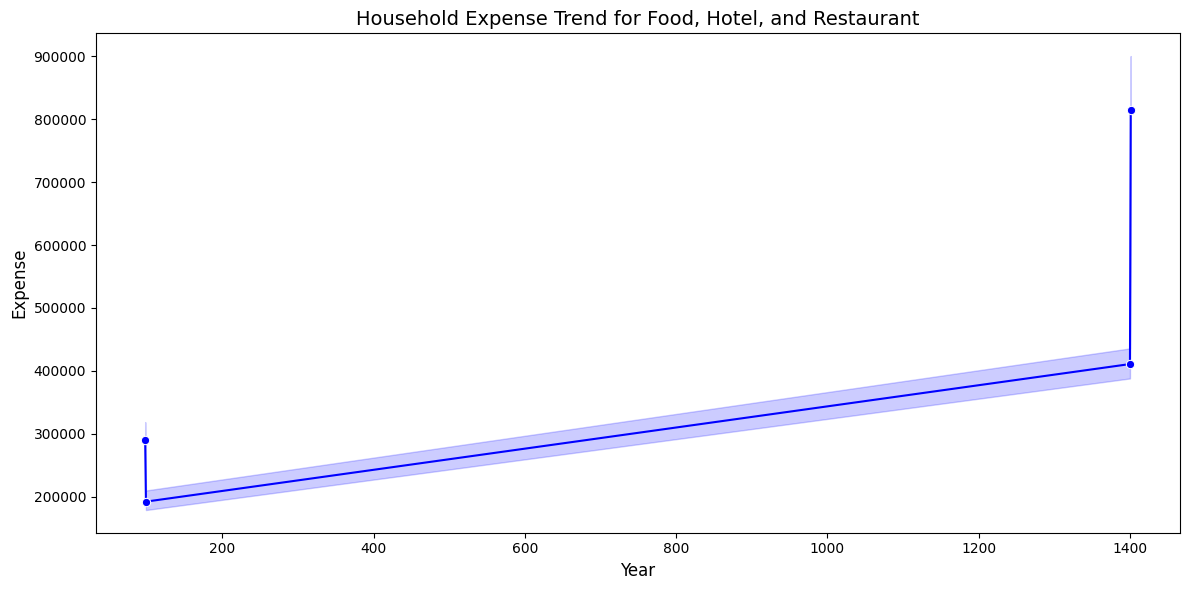

In [29]:
plot_household_expense_trend(data)